# TASK - 1: Exploratory Data Analysis (EDA) and Business Insights

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
customer = pd.read_csv("/content/Customers.csv")
product = pd.read_csv("/content/Products.csv")
transaction = pd.read_csv("/content/Transactions.csv")

In [41]:
customer.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [42]:
product.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [43]:
transaction.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


## Display information about datasets

In [44]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [45]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [46]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


## Check for missing values in each dataset

In [47]:
customer.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [48]:
product.isnull().sum()

,0
ProductID,0
ProductName,0
Category,0
Price,0


In [49]:
transaction.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


## Converting data to required format

In [50]:
customer['SignupDate'] = pd.to_datetime(customer['SignupDate'])
transaction['TransactionDate'] = pd.to_datetime(transaction['TransactionDate'])

In [51]:
product['Price'] = pd.to_numeric(product['Price'])
transaction['Quantity'] = pd.to_numeric(transaction['Quantity'])
transaction['TotalValue'] = pd.to_numeric(transaction['TotalValue'])

In [52]:
customer.dtypes

,0
CustomerID,object
CustomerName,object
Region,object
SignupDate,datetime64[ns]


In [53]:
product.dtypes

,0
ProductID,object
ProductName,object
Category,object
Price,float64


In [54]:
transaction.dtypes

,0
TransactionID,object
CustomerID,object
ProductID,object
TransactionDate,datetime64[ns]
Quantity,int64
TotalValue,float64
Price,float64


## Merging transaction dataset with customers and products

In [57]:
merged = transaction.merge(customer, on = "CustomerID", suffixes = ("_Transaction", "_Customer")).merge(product, on = "ProductID", suffixes = ("_Merged", "_Product"))

In [59]:
merged.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_Merged,CustomerName,Region,SignupDate,ProductName,Category,Price_Product
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [60]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_Merged     1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_Product    1000 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(7)
memory usage: 101.7+ KB


In [61]:
merged.describe()

,TransactionDate,Quantity,TotalValue,Price_Merged,SignupDate,Price_Product
count,1000,1000.000000,1000.000000,1000.00000,1000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407,2023-07-09 02:49:55.199999744,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000,2022-01-22 00:00:00,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000,2022-09-17 12:00:00,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000,2023-07-23 00:00:00,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000,2024-04-12 00:00:00,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000,2024-12-28 00:00:00,497.76000
std,NaN,1.117981,493.144478,140.73639,NaN,140.73639


In [62]:
merged.isnull().sum()

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price_Merged,0
CustomerName,0
Region,0
SignupDate,0


In [64]:
merged.duplicated().sum()

0

In [97]:
merged['SignupDate'] = pd.to_datetime(merged['SignupDate'])
merged['TransactionDate'] = pd.to_datetime(merged['TransactionDate'])

In [98]:
# to ensure the 'Qauntity' and 'TotalValue' are numeric
merged['Quantity'] = pd.to_numeric(merged['Quantity'])
merged['TotalValue'] = pd.to_numeric(merged['TotalValue'])

## Deriving business insights

In [99]:
!pip install squarify

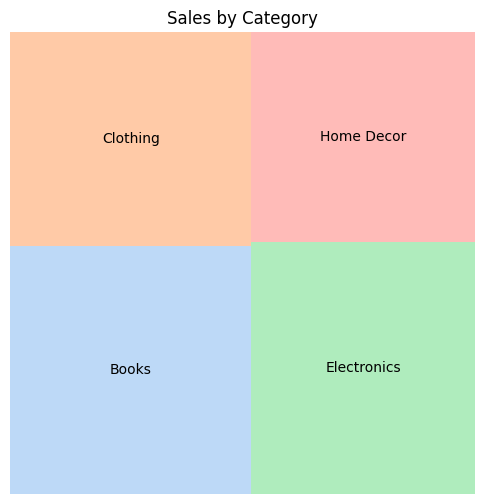

In [100]:
# Sales by Category
import squarify
category_sales = merged.groupby('Category').agg({'TotalValue': 'sum'}).reset_index()
plt.figure(figsize=(6,6))
squarify.plot(sizes=category_sales['TotalValue'], label=category_sales['Category'], color=sns.color_palette('pastel', len(category_sales)), alpha=.7 )
plt.axis('off')
plt.title('Sales by Category')
plt.show()

The treemap visualization showcases the sales distribution across various product categories, with each rectangle's size proportionate to the total sales value of the corresponding category.

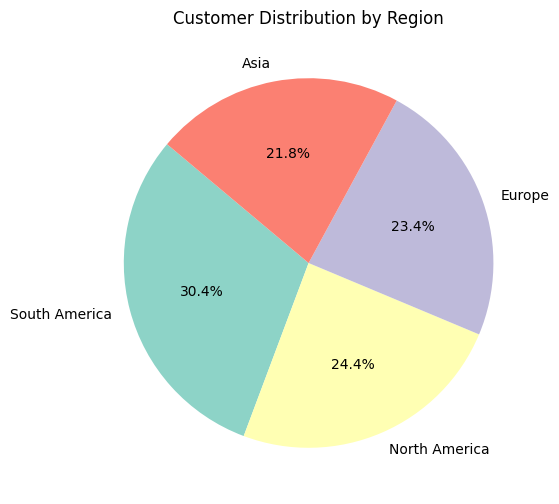

In [101]:
# Customer Distribution by Region
region_counts = merged['Region'].value_counts()
plt.figure(figsize=(6,6))
region_counts.plot.pie(autopct='%1.1f%%', colors=sns.color_palette("Set3", len(region_counts)), startangle=140)
plt.title('Customer Distribution by Region')
plt.ylabel('')  # Hide the y-axis label
plt.show()

The pie chart represents the distribution of customers across various regions, with each slice proportional to the percentage of customers in that region. The use of a distinct color palette ensures clear differentiation between regions.

<ipython-input-102-c5f5ae4de42e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ProductName', y='Quantity', data = top_selling_products, palette = "pastel")


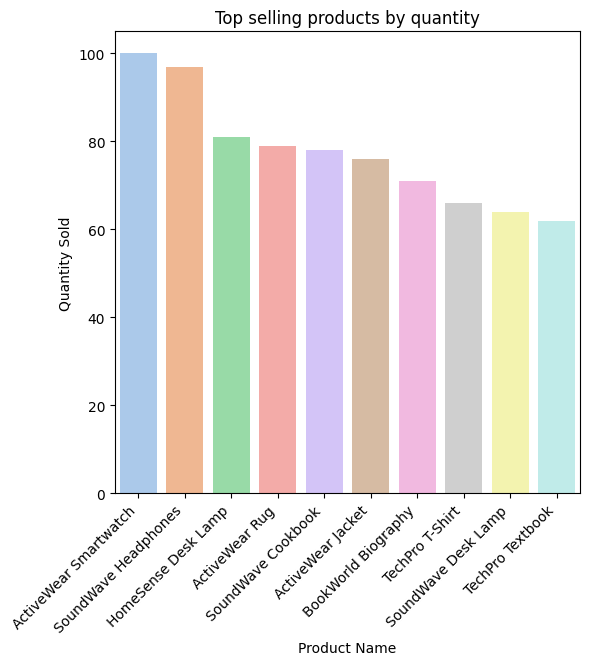

In [102]:
# Top selling products
top_selling_products = merged.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(6,6))
sns.barplot(x='ProductName', y='Quantity', data = top_selling_products, palette = "pastel")
plt.title('Top selling products by quantity')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

The bar chart highlights the top 10 best-selling products based on quantity sold. Each bar represents a product, with its length corresponding to the total quantity sold.

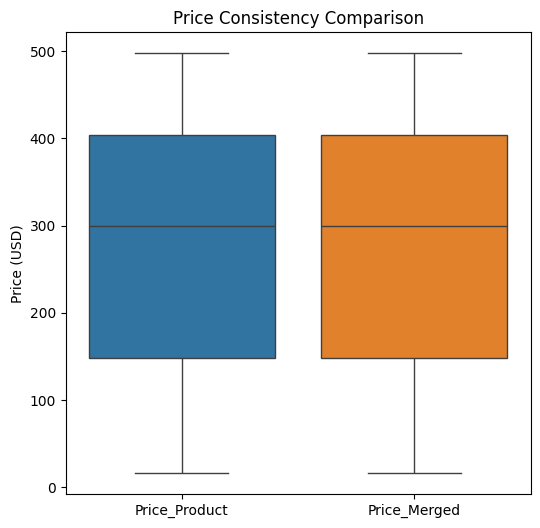

In [120]:
# Price Consistency Comparison
plt.figure(figsize=(6, 6))
sns.boxplot(data=merged[['Price_Product', 'Price_Merged']])
plt.title('Price Consistency Comparison')
plt.ylabel('Price (USD)')
plt.show()

The boxplot visualizes the price consistency between the product's listed price (Price_Product) and the merged price (Price_Merged). Each box represents the distribution of prices, showing the median, quartiles, and potential outliers.

<ipython-input-125-2a6f0cd53167>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Price_Product', data = average_price_per_category, palette = "magma")


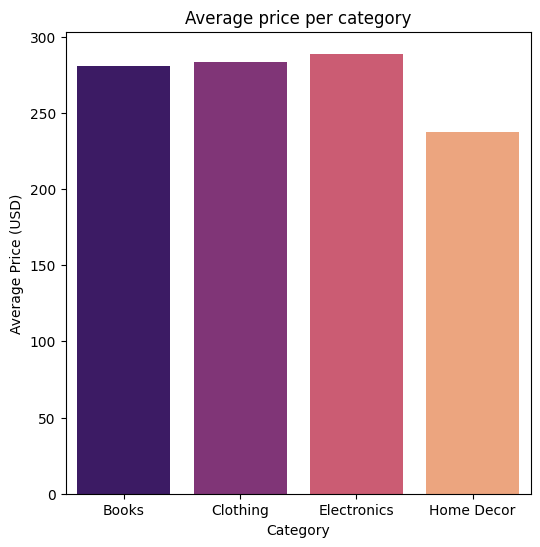

In [125]:
#Average price per category
average_price_per_category = merged.groupby('Category')['Price_Product'].mean().reset_index()
plt.figure(figsize=(6,6))
sns.barplot(x='Category', y='Price_Product', data = average_price_per_category, palette = "magma")
plt.title('Average price per category')
plt.xlabel('Category')
plt.ylabel('Average Price (USD)')
plt.show()

The barplot displays the average price of products within each category. By grouping the dataset by category and calculating the mean price, we get an overview of how prices vary across different categories.